# Challenge: Data visualization

## Importación

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📌 Extracción

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🔧 Transformación

In [4]:
df_customer = pd.json_normalize(df['customer']) #Normalizando las columnas
df_phone = pd.json_normalize(df['phone']) #Con diccionarios/json
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df_charges_monthly = df_account['Charges.Monthly'].rename('ChargeMonthly') #Asignando a un df cada columna
df_charges_total = df_account['Charges.Total'].rename('ChargeTotal')  #anidada de los cargos

df_account.drop(columns=['Charges.Monthly','Charges.Total'], inplace=True)
df_account.head() #Eliminando las columnas reasignadas

,Contract,PaperlessBilling,PaymentMethod
0,One year,Yes,Mailed check
1,Month-to-month,No,Mailed check
2,Month-to-month,Yes,Electronic check
3,Month-to-month,Yes,Electronic check
4,Month-to-month,Yes,Mailed check


In [5]:
# Uniendo los dataframes ya normalizados
df_norm = pd.concat([df['Churn'], df_customer, df_phone,df_internet,df_account,df_charges_monthly,df_charges_total], axis=1)
df_norm.to_csv('df_norm.csv', index=False)
df_norm.info()

df_norm['ChargeTotal'] = pd.to_numeric(df_norm['ChargeTotal'], errors='coerce')
df_norm['ChargeDaily'] = df_norm['ChargeMonthly'] / 30
df_norm['Churn'] = df_norm['Churn'].fillna('No') #Rellenando datos vacios
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


Imprimiendo una muestra aleatoria de 5 registros del _dataframe_

In [6]:
df_norm.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargeMonthly,ChargeTotal,ChargeDaily
6242,No,Female,0,No,No,41,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65,2.488333
458,Yes,Male,0,Yes,Yes,21,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,104.40,2157.95,3.480000
6982,No,Female,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.45,82.85,0.681667
1027,Yes,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,3.855000
7120,No,Female,0,Yes,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.80,1615.10,2.526667


Imprimiendo datos estadísticos del _dataframe_

In [7]:
df_norm.describe()

,SeniorCitizen,tenure,ChargeMonthly,ChargeTotal,ChargeDaily
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## 📊 Carga y análisis

### Análisis de abandono respecto a número de meses de contrato

In [8]:
#Dividiendo el dataset en dos
df_churn_yes = df_norm[df_norm['Churn'] == 'Yes']
df_churn_no = df_norm[df_norm['Churn'] == 'No']
df_churn_no.shape, df_churn_yes.shape

((5174, 21), (1869, 21))

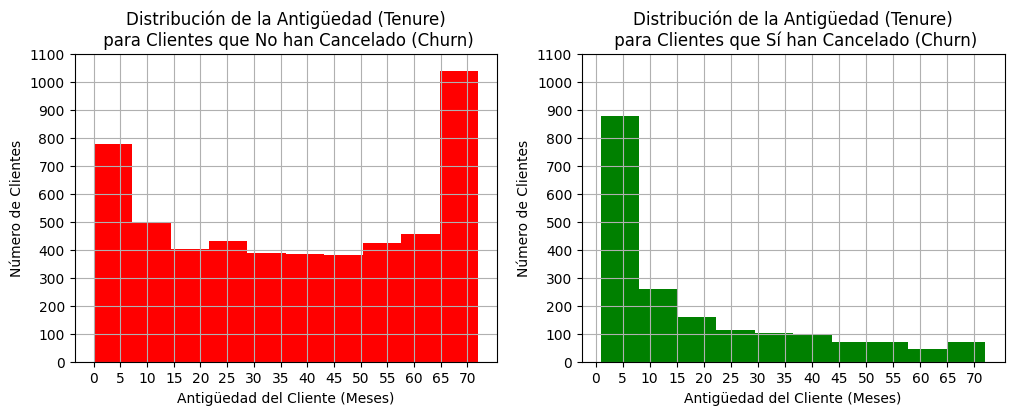

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))# Subplot 1: Clientes que NO han cancelado
ax[0].hist(df_churn_no['tenure'],color="red")
ax[0].set_title('Distribución de la Antigüedad (Tenure)\n para Clientes que No han Cancelado (Churn)')
ax[0].set_xlabel('Antigüedad del Cliente (Meses)')
ax[0].set_ylabel('Número de Clientes')
ax[0].set_xticks(range(0, 71, 5))
ax[0].set_ylim(0, 1100) #Estableciendo rango para mejor comparación
ax[0].set_yticks(range(0, 1101, 100))
ax[0].grid()

# Subplot 2: Clientes que SÍ han cancelado
ax[1].hist(df_churn_yes['tenure'],color="green")
ax[1].set_title('Distribución de la Antigüedad (Tenure)\n para Clientes que Sí han Cancelado (Churn)')
ax[1].set_xlabel('Antigüedad del Cliente (Meses)')
ax[1].set_ylabel('Número de Clientes')
ax[1].set_xticks(range(0, 71, 5))
ax[1].set_yticks(range(0, 1101, 100))
ax[1].set_ylim(0, 1100)
ax[1].grid()
plt.show()

##### 👀Se puede observar que hay una gran cantidad de clientes que cancelan antes de los primeros 10 meses y que superado este período las cancelaciones se reducen significativamente.

### Análisis de abandono respecto al género

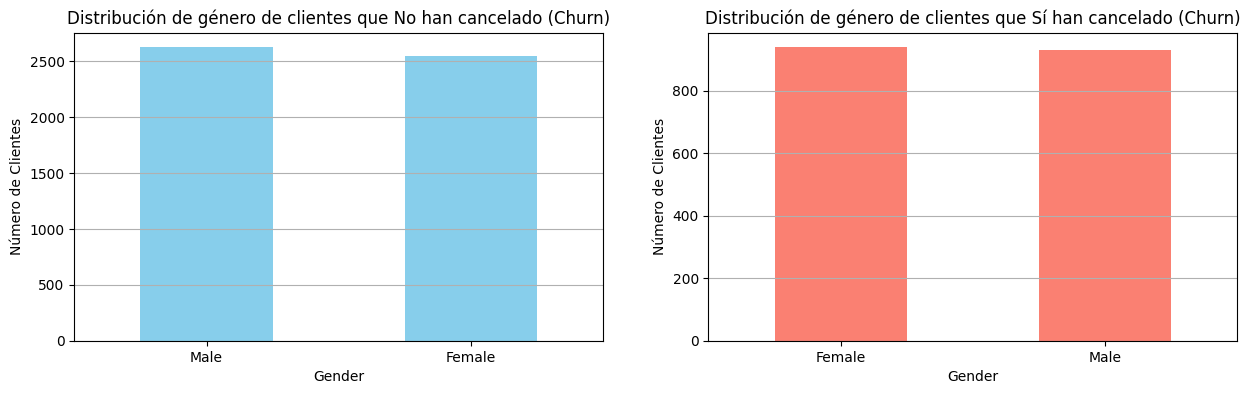

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
col = 'gender'
# Subplot 1: Clientes que NO han cancelado
df_churn_no[col].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title(f'Distribución de género de clientes que No han cancelado (Churn)')
ax[0].set_xlabel(col.capitalize())
ax[0].set_ylabel('Número de Clientes')
ax[0].tick_params(axis='x', rotation=0) # Rotar etiquetas para mejor lectura
ax[0].grid(axis="y")

# Subplot 2: Clientes que SÍ han cancelado
df_churn_yes[col].value_counts().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title(f'Distribución de género de clientes que Sí han cancelado (Churn)')
ax[1].set_xlabel(col.capitalize())
ax[1].set_ylabel('Número de Clientes')
ax[1].tick_params(axis='x', rotation=0) # Rotar etiquetas
ax[1].grid(axis="y")

plt.show()

##### 👀Se puede observar que proporciones similares de hombres y mujeres han cancelado el servicio y de igual forma son muy similares las proporciones en los clientes que continuan con servicios.

### Análisis de abandono respecto a los clientes de tercera edad

In [13]:
# Gráfico para 'SeniorCitizen'
col = 'SeniorCitizen'

# Mapear 0 y 1 a 'No' y 'Yes' para una mejor lectura en el gráfico
labels_map = {0: 'No', 1: 'Yes'}

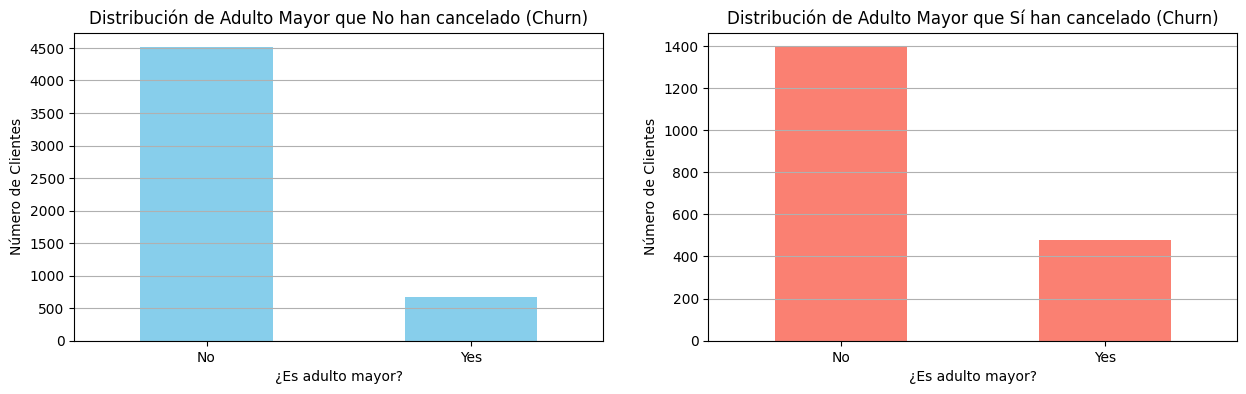

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
# Subplot 1: Clientes que NO han cancelado
df_churn_no[col].value_counts().sort_index().rename(index=labels_map).plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title(f'Distribución de Adulto Mayor que No han cancelado (Churn)')
ax[0].set_xlabel('¿Es adulto mayor?')
ax[0].set_ylabel('Número de Clientes')
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_yticks(range(0, 4501,500))
ax[0].grid(axis="y")

# Subplot 2: Clientes que SÍ han cancelado
df_churn_yes[col].value_counts().sort_index().rename(index=labels_map).plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title(f'Distribución de Adulto Mayor que Sí han cancelado (Churn)')
ax[1].set_xlabel('¿Es adulto mayor?')
ax[1].set_ylabel('Número de Clientes')
ax[1].tick_params(axis='x', rotation=0)
ax[1].grid(axis="y")

plt.show()

##### 👀Se puede observar que hay una mayor cantidad de clientes que cancelaron que no son adultos mayores, pero de la misma manera, la mayoría de clientes que se mantienen no son adultos mayores.

### Análisis de abandono respecto a los clientes con pareja (o no), y con dependientes (o no)

In [15]:
# Obtener conteos para Partner y dependents de los clientes que No han cancelado
partner_dependents_counts_no = df_churn_no[['Partner', 'Dependents']].value_counts().sort_index()

# Crear un Series combinado para el plot
plot_data_no = pd.Series(dtype='int64') # Inicializar con un dtype específico
plot_data_no['Partner: No, Dependents: No'] = partner_dependents_counts_no.get(('No', 'No'), 0)
plot_data_no['Partner: No, Dependents: Yes'] = partner_dependents_counts_no.get(('No', 'Yes'), 0)
plot_data_no['Partner: Yes, Dependents: No'] = partner_dependents_counts_no.get(('No','Yes'), 0)
plot_data_no['Partner: Yes, Dependents: Yes'] = partner_dependents_counts_no.get(('Yes','Yes'), 0)

In [16]:
# Obtener conteos para Partner y dependents de los clientes que Sí han cancelado
partner_dependents_counts_yes = df_churn_yes[['Partner', 'Dependents']].value_counts().sort_index()

# Crear un Series combinado para el plot
plot_data_yes = pd.Series(dtype='int64') # Inicializar con un dtype específico
plot_data_yes['Partner: No, Dependents: No'] = partner_dependents_counts_yes.get(('No', 'No'), 0)
plot_data_yes['Partner: No, Dependents: Yes'] = partner_dependents_counts_yes.get(('No', 'Yes'), 0)
plot_data_yes['Partner: Yes, Dependents: No'] = partner_dependents_counts_yes.get(('No','Yes'), 0)
plot_data_yes['Partner: Yes, Dependents: Yes'] = partner_dependents_counts_yes.get(('Yes','Yes'), 0)

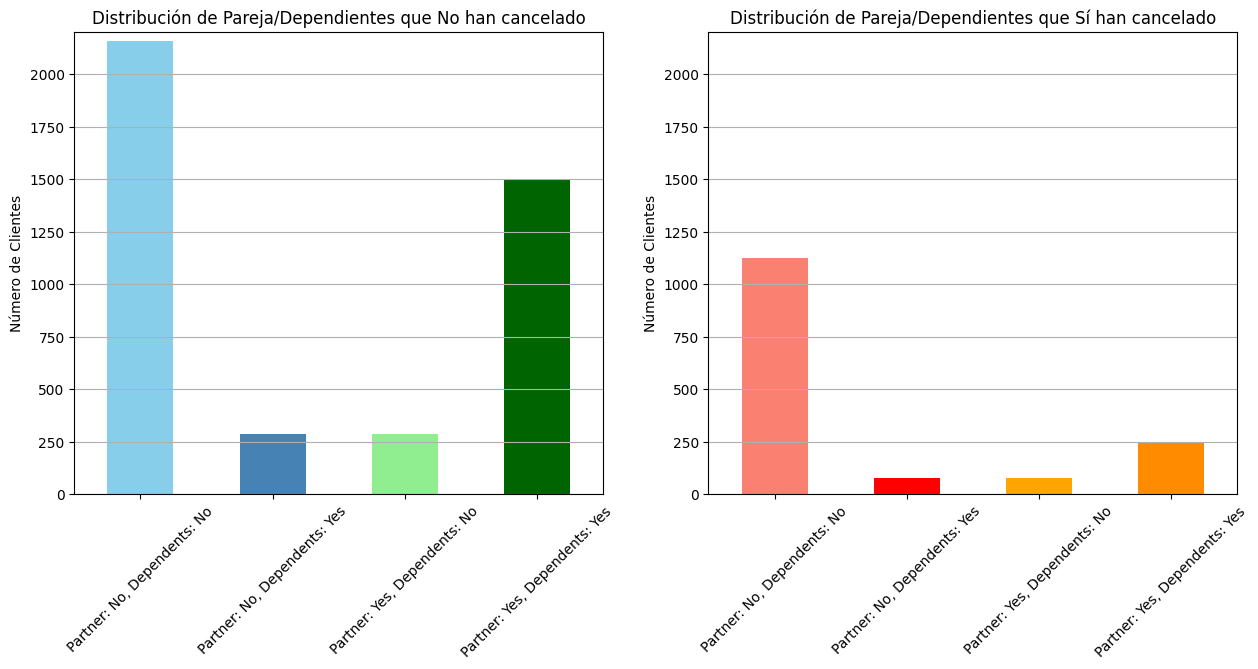

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Clientes que NO han cancelado
plot_data_no.plot(kind='bar', ax=ax[0], color=['skyblue', 'steelblue', 'lightgreen', 'darkgreen'])
ax[0].set_title('Distribución de Pareja/Dependientes que No han cancelado')
ax[0].set_ylabel('Número de Clientes')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0,2200)
ax[0].grid(axis="y")

# --- Subplot 2: Clientes que SÍ han cancelado (Churn: Yes) ---
plot_data_yes.plot(kind='bar', ax=ax[1], color=['salmon', 'red', 'orange', 'darkorange'])
ax[1].set_title('Distribución de Pareja/Dependientes que Sí han cancelado')
ax[1].set_ylabel('Número de Clientes')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim(0,2200)
ax[1].grid(axis="y")

plt.show()

##### 👀Se puede ver que los clientes que no tienen pareja ni dependientes seguidos de los que sí tienen pareja y además dependientes son los que más cancelan. Sin embargo, esta misma tendencia se mantiene entre los clientes que continuan con el servicio.

### Análisis de abandono respecto a servicios ofrecidos

In [18]:
# Definir las columnas de servicios a analizar (Menos InternetService)
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [19]:
proportions_no = {} #Diccionarios para guardar los datos
proportions_yes = {}
col = 'InternetService' #Columna de internet porque tiene varios tipos
# Para InternetService, las proporciones de cada tipo de los clientes que no han cancelado
counts = df_churn_no[col].value_counts(normalize=True) * 100
proportions_no[f'{col}: DSL'] = counts.get('DSL', 0)
proportions_no[f'{col}: Fiber optic'] = counts.get('Fiber optic', 0)
proportions_no[f'{col}: No internet service'] = counts.get('No', 0)

In [20]:
# Para los clientes que Sí han cancelado y con servicio de internet
counts = df_churn_yes[col].value_counts(normalize=True) * 100
proportions_yes[f'{col}: DSL'] = counts.get('DSL', 0)
proportions_yes[f'{col}: Fiber optic'] = counts.get('Fiber optic', 0)
proportions_yes[f'{col}: No internet service'] = counts.get('No', 0)

In [21]:
#Ciclo para iterer en las demás columnas de servicios
for col in service_cols:# Para otros servicios, la proporción de 'Yes'
    proportions_no[col] = df_churn_no[col].value_counts(normalize=True).get('Yes', 0) * 100
    proportions_yes[col] = df_churn_yes[col].value_counts(normalize=True).get('Yes', 0) * 100

In [22]:
#Convertir los diccionarios a series
df_proportions_no = pd.Series(proportions_no).sort_values()
df_proportions_yes = pd.Series(proportions_yes).sort_values()

In [23]:
def text_percent(bar_type, pos): #Función para imprimir los porcentajes de
    for bar in bar_type: #Cada barra en ambos subplots
        width = bar.get_width()
        ax[pos].text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

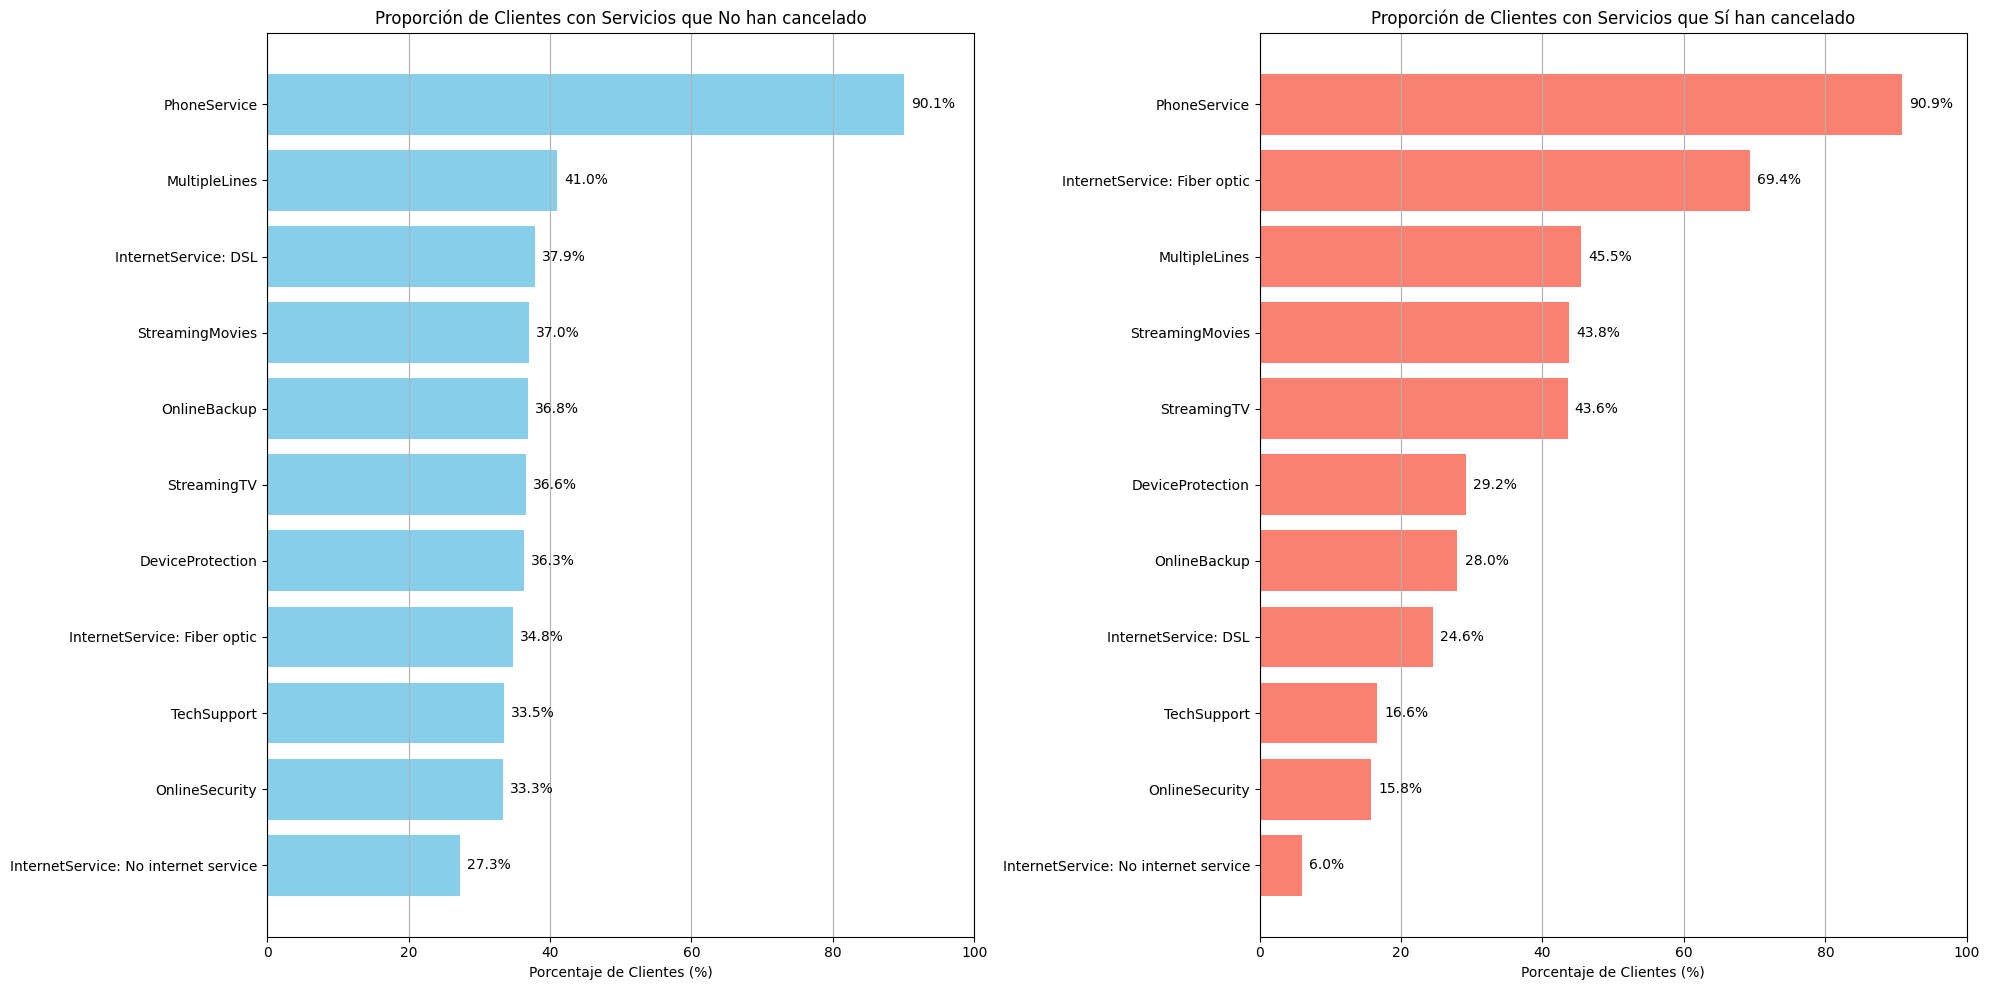

In [24]:
# Crear los subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# --- Subplot 1: Proporciones de Servicios (Churn: No) ---
bars_no = ax[0].barh(df_proportions_no.index, df_proportions_no.values, color='skyblue')
ax[0].set_title('Proporción de Clientes con Servicios que No han cancelado')
ax[0].set_xlabel('Porcentaje de Clientes (%)')
ax[0].set_xlim(0, 100) # Establecer límite Y de 0 a 100%
ax[0].grid(axis="x")
text_percent(bars_no, 0)

# --- Subplot 2: Proporciones de Servicios (Churn: Yes) ---
bars_yes = ax[1].barh(df_proportions_yes.index, df_proportions_yes.values, color='salmon')
ax[1].set_title('Proporción de Clientes con Servicios que Sí han cancelado')
ax[1].set_xlabel('Porcentaje de Clientes (%)')
ax[1].set_xlim(0, 100) # Establecer límite Y de 0 a 100%
ax[1].grid(axis="x")
text_percent(bars_yes, 1)

plt.tight_layout() #Para que los subplots no se crucen entre sí
plt.show()

##### 👀Se puede observar que de los clientes que cancelaron cerca del 90% tenían _PhoneService_, aunque un porcentaje sumamente parecido se presenta entre los clientes que no cancelaron. El servicio de internet _Fiber Optic_ sí presenta notables diferencias, siendo de un **69.4%** para los clientes que Sí cancelaron su servicio, mientras que para los que no cancelaron solo representa un **34.8%**. 

##### Por lo mismo, valdría la pena analizar los servicios de internet y su relación con la cancelación del servicio.

##### Otro aspecto a analizar podría ser el de los servicios relacionados a la protección como: _OnlineSecurity_, _OnlineBackup_, _DeviceProtection_ y _TechSupport_. Ya que pocos usuarios de los que cancelaron los tenían contratados (15.8, 28, 29.2, 16.6)%, respectivamente. Mientras que en los usuarios que no han cancelado estos porcentajes aumentan notablemente (33.3, 36.8, 36.3, 33.5)%, respectivamente.

### Análisis de tasa abandono según los servicios de internet

In [25]:
df_norm['Churn_Numeric'] = df_norm['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
churn_rate_by_internet_service = (df_norm.groupby('InternetService')['Churn_Numeric'].mean() * 100).sort_values()

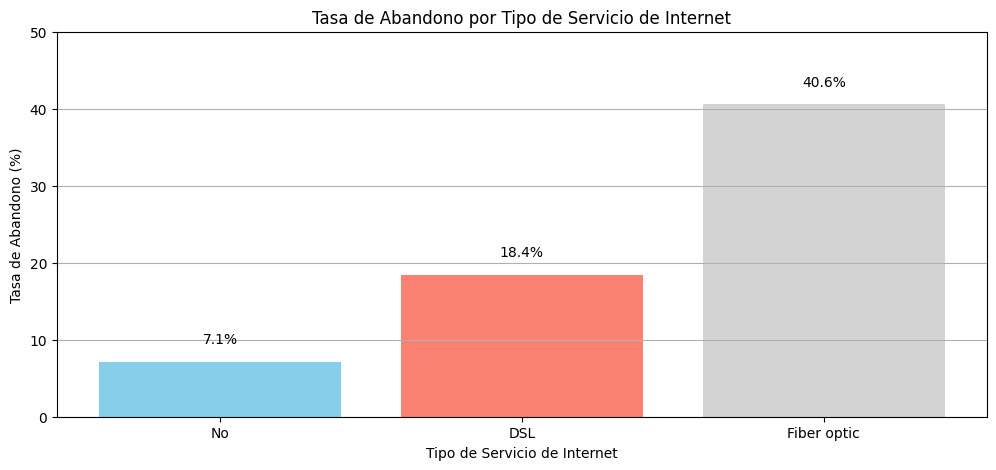

In [26]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(churn_rate_by_internet_service.index, churn_rate_by_internet_service.values, color=['skyblue', 'salmon', 'lightgrey'])

plt.title('Tasa de Abandono por Tipo de Servicio de Internet')
plt.xlabel('Tipo de Servicio de Internet')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, 50) # El porcentaje va de 0 a 50%

# Añadir etiquetas de porcentaje en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

##### 👀Como se puede observar un cliente al tener el servicio de _Fiber Optic_ tiene un **40.6%** de probabilidad de cancelar el servicio. Un porcentaje muy alto comparado con _DSL_ de **18.4%** o el no tener de solo el **7.1%**.

### Análisis de tasa de abandono según los servicios de protección

In [27]:
#lista de los servicios de protección
protective_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
plot_data = []

In [28]:
# Calcular la tasa de abandono para cada categoría de cada servicio protector
for service_col in protective_services:
    # Obtener todas las categorías únicas para el servicio (Yes, No, No internet service)
    categories = df_norm[service_col].unique()
    for category in categories:
        # Filtrar el DataFrame por la categoría actual del servicio
        subset = df_norm[df_norm[service_col] == category]

        # Calcular la tasa de abandono para este subconjunto
        churn_rate = subset['Churn_Numeric'].mean() * 100

        # Almacenar los datos para graficar
        plot_data.append({
            'Servicio': f'{service_col.replace("Online", "").replace("Device", "").replace("Tech", "")}: {category}', # Nombres más cortos
            'Tasa_Abandono': churn_rate
        })

In [29]:
# Convertir la lista de diccionarios a un DataFrame
df_plot_data = pd.DataFrame(plot_data)

# Ordenar los datos para una mejor visualización
df_plot_data = df_plot_data.sort_values(by='Tasa_Abandono', ascending=False)

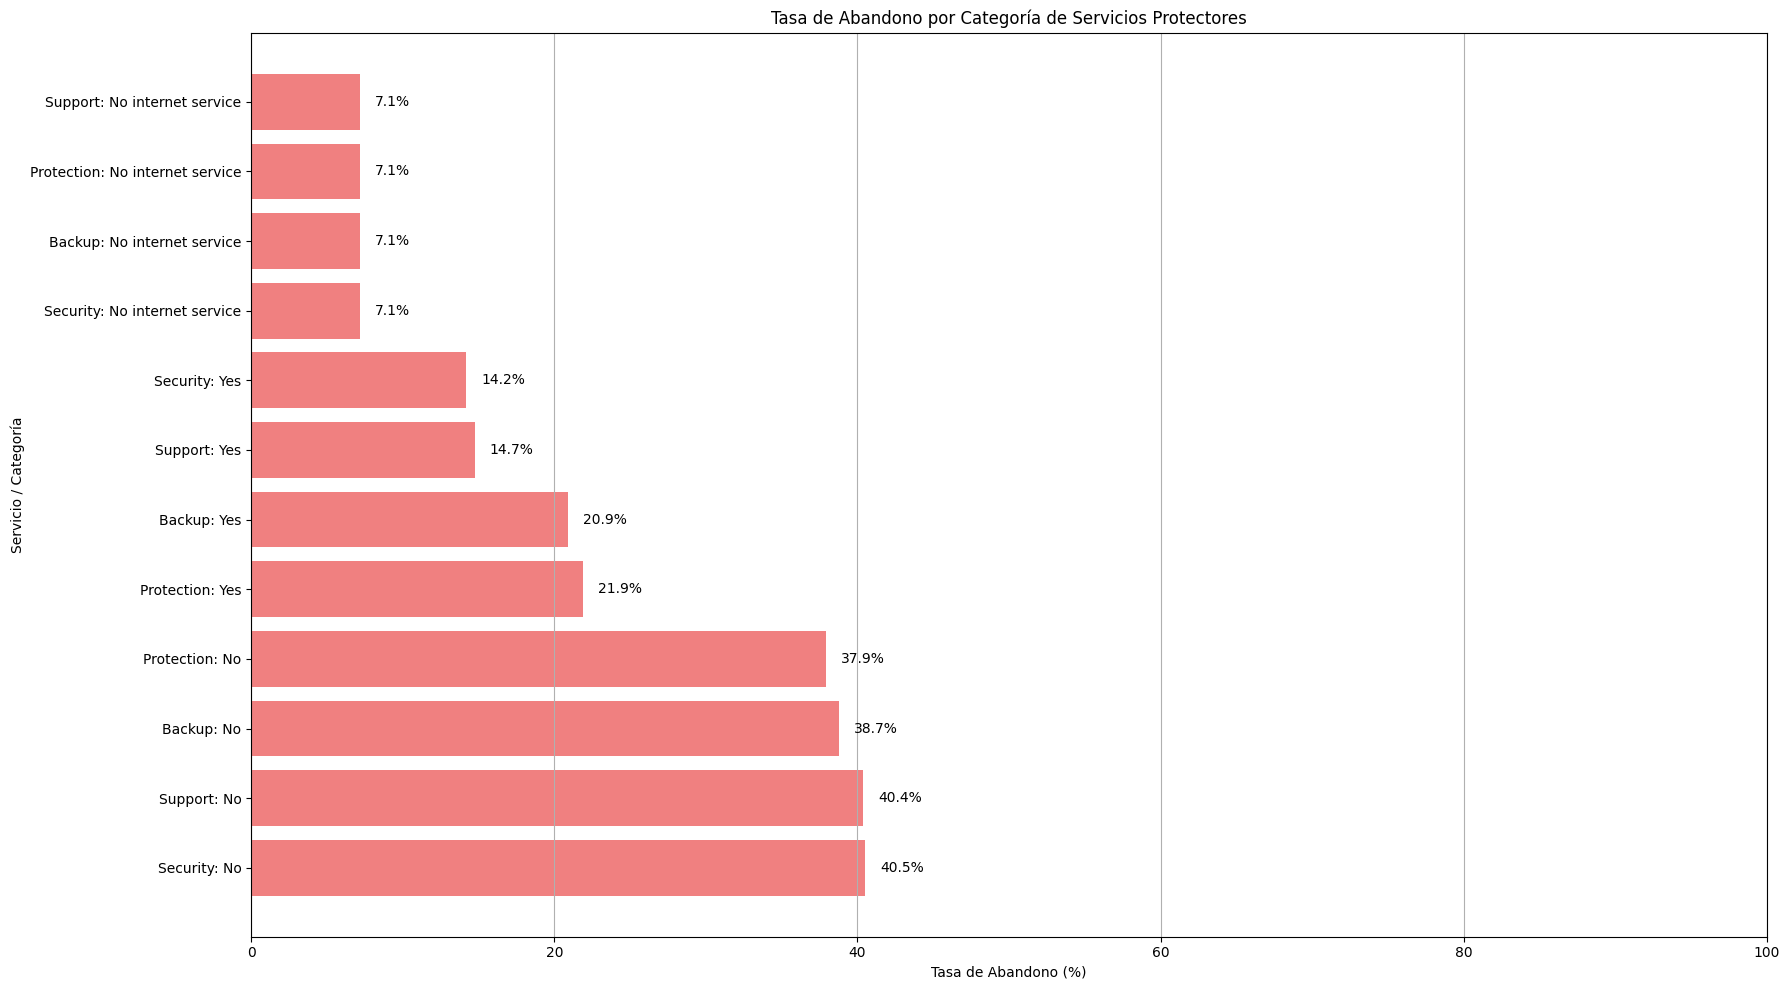

In [39]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(18, 10))
bars = plt.barh(df_plot_data['Servicio'], df_plot_data['Tasa_Abandono'], color='lightcoral')

plt.title('Tasa de Abandono por Categoría de Servicios Protectores')
plt.xlabel('Tasa de Abandono (%)')
plt.ylabel('Servicio / Categoría')
plt.xlim(0, 100) # Establecer límite X de 0 a 100%

# Añadir etiquetas de porcentaje a las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

##### 👀Como se puede observar el hecho de no tener contratados servicios de seguridad/protección hace que aumenten las probabilidades de cancelar respecto a sí tenerlos. Llegando a desde un **37.9%** hasta un **40.5%** de tasa de abandono.

### Análisis de abandono respecto a la duración del contrato

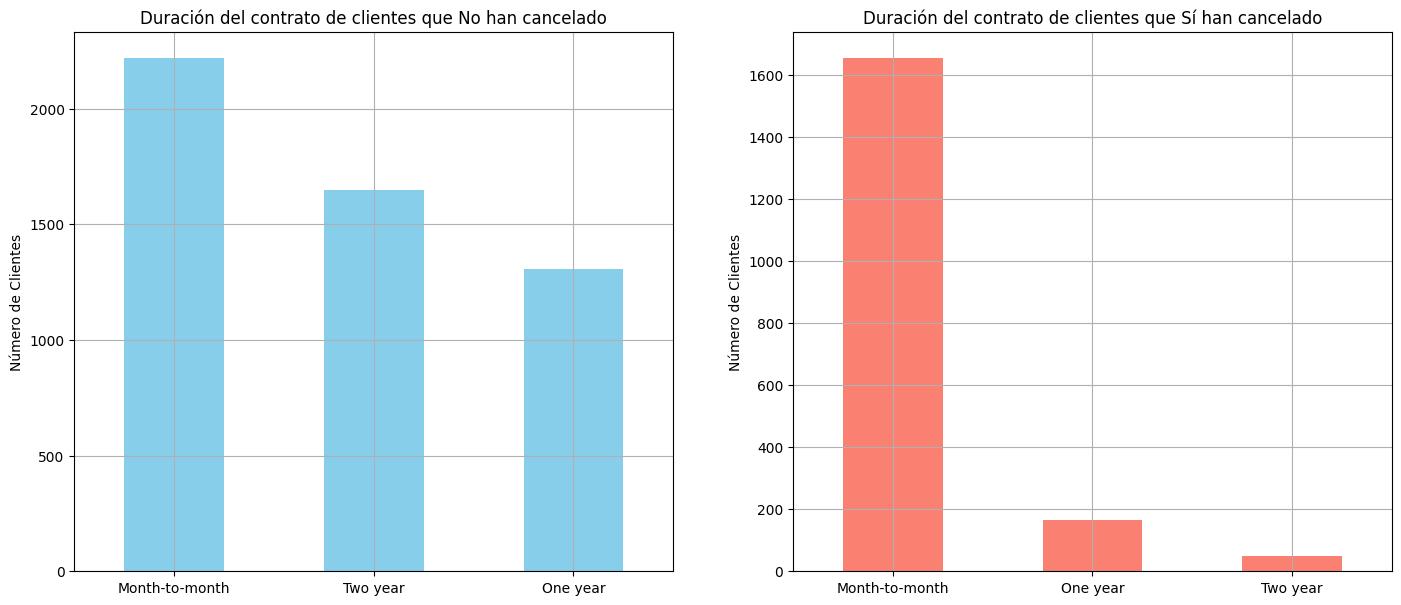

In [42]:
fig, ax = plt.subplots(1,2,figsize=(17, 7))
col = 'Contract'
# Subplot 1: Clientes que NO han cancelado
df_churn_no[col].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title(f'Duración del contrato de clientes que No han cancelado')
ax[0].set_xlabel('')
ax[0].set_ylabel('Número de Clientes')
ax[0].tick_params(axis='x', rotation=0) # Rotar etiquetas
ax[0].grid()

# Subplot 2: Clientes que SÍ han cancelado
df_churn_yes[col].value_counts().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title(f'Duración del contrato de clientes que Sí han cancelado')
ax[1].set_xlabel('')
ax[1].set_ylabel('Número de Clientes')
ax[1].tick_params(axis='x', rotation=0) # Rotar etiquetas
ax[1].grid()

plt.show()

##### 👀Se puede observar que una mayor cantidad de clientes con contratos a corto plazo (mes a mes) han sido los que han cancelado.

### Análisis de abandono respecto al método de pago

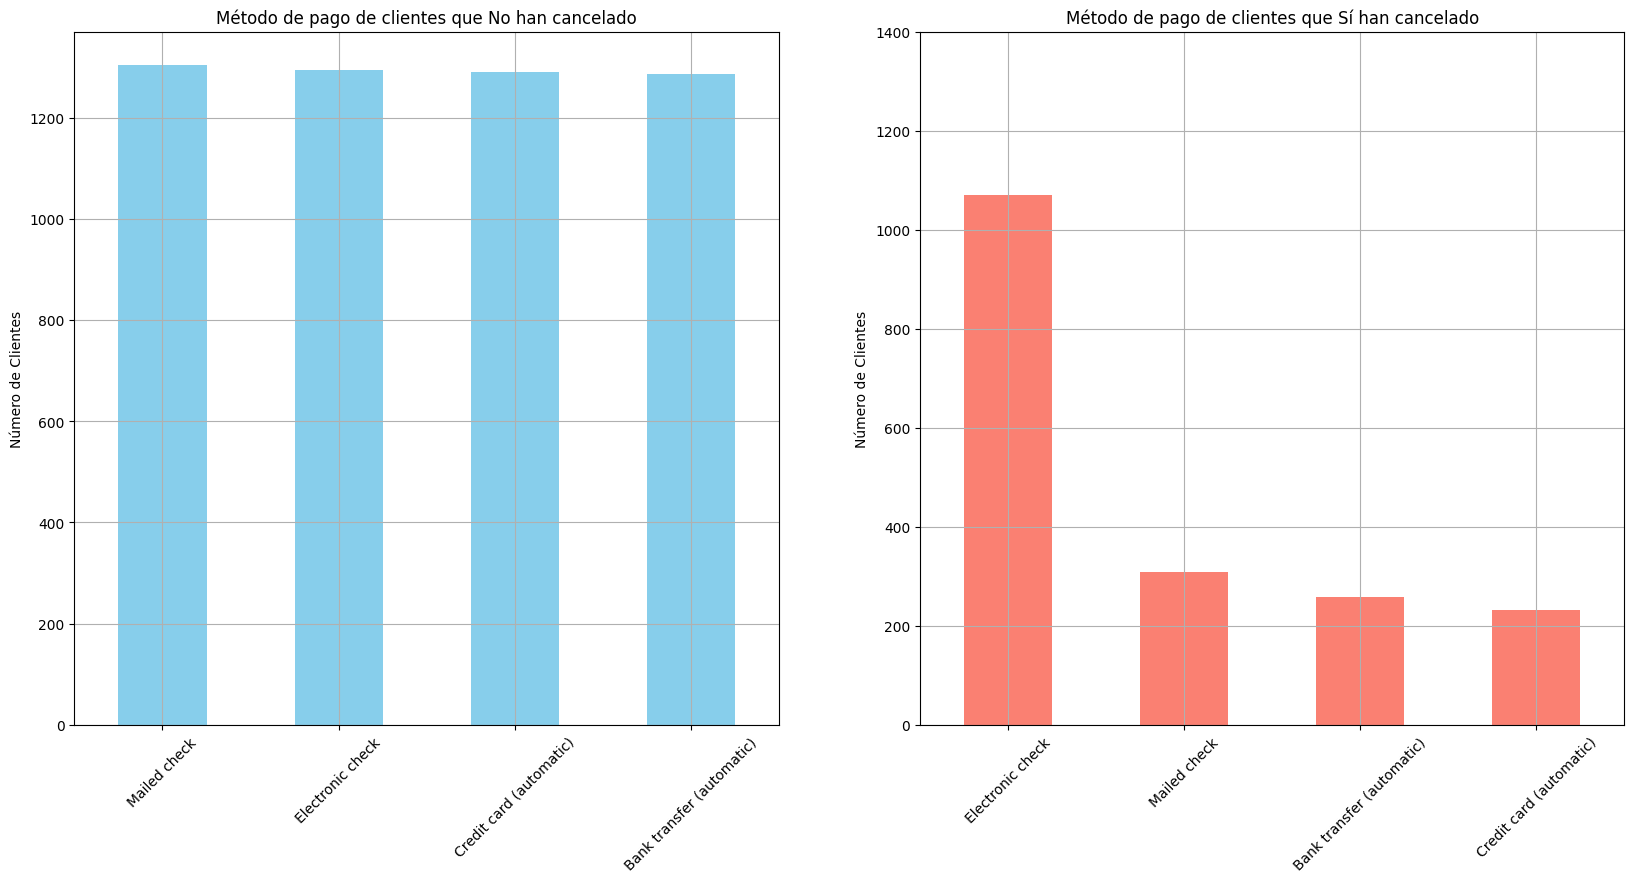

In [41]:
fig, ax = plt.subplots(1,2,figsize=(20, 9))
col = 'PaymentMethod'
# Subplot 1: Clientes que NO han cancelado
df_churn_no[col].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title(f'Método de pago de clientes que No han cancelado')
ax[0].set_xlabel('')
ax[0].set_ylabel('Número de Clientes')
ax[0].tick_params(axis='x', rotation=45) # Rotar etiquetas
ax[1].set_ylim(0,1400)
ax[0].grid()

# Subplot 2: Clientes que SÍ han cancelado
df_churn_yes[col].value_counts().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title(f'Método de pago de clientes que Sí han cancelado')
ax[1].set_xlabel('')
ax[1].set_ylabel('Número de Clientes')
ax[1].tick_params(axis='x', rotation=45) # Rotar etiquetas
ax[1].set_ylim(0,1400)
ax[1].grid()

plt.show()

##### 👀Se puede observar que la cantidad de clientes que han cancelado es mayor con el método de pago de _Electronic check_

### Buscando correlación entre el precio de la fibra óptica y la tasa de abandono

In [43]:
# Filtrar el DataFrame para obtener solo clientes con InternetService 'Fiber optic'
df_fiber_optic = df_norm[df_norm['InternetService'] == 'Fiber optic'].copy()

In [44]:
# Calcular la correlación entre Charges_Monthly y Churn_Numeric
correlation_monthly_churn = df_fiber_optic['ChargeMonthly'].corr(df_fiber_optic['Churn_Numeric'])

# Calcular la correlación entre Charges_Total y Churn_Numeric
correlation_total_churn = df_fiber_optic['ChargeTotal'].corr(df_fiber_optic['Churn_Numeric'])
correlation_monthly_churn, correlation_total_churn

(np.float64(-0.22064693624119033), np.float64(-0.4153723632489833))

In [45]:
correlations = {
    'Charges_Monthly vs Churn': correlation_monthly_churn,
    'Charges_Total vs Churn': correlation_total_churn
}

# Convertir a Series
correlation_series = pd.Series(correlations)

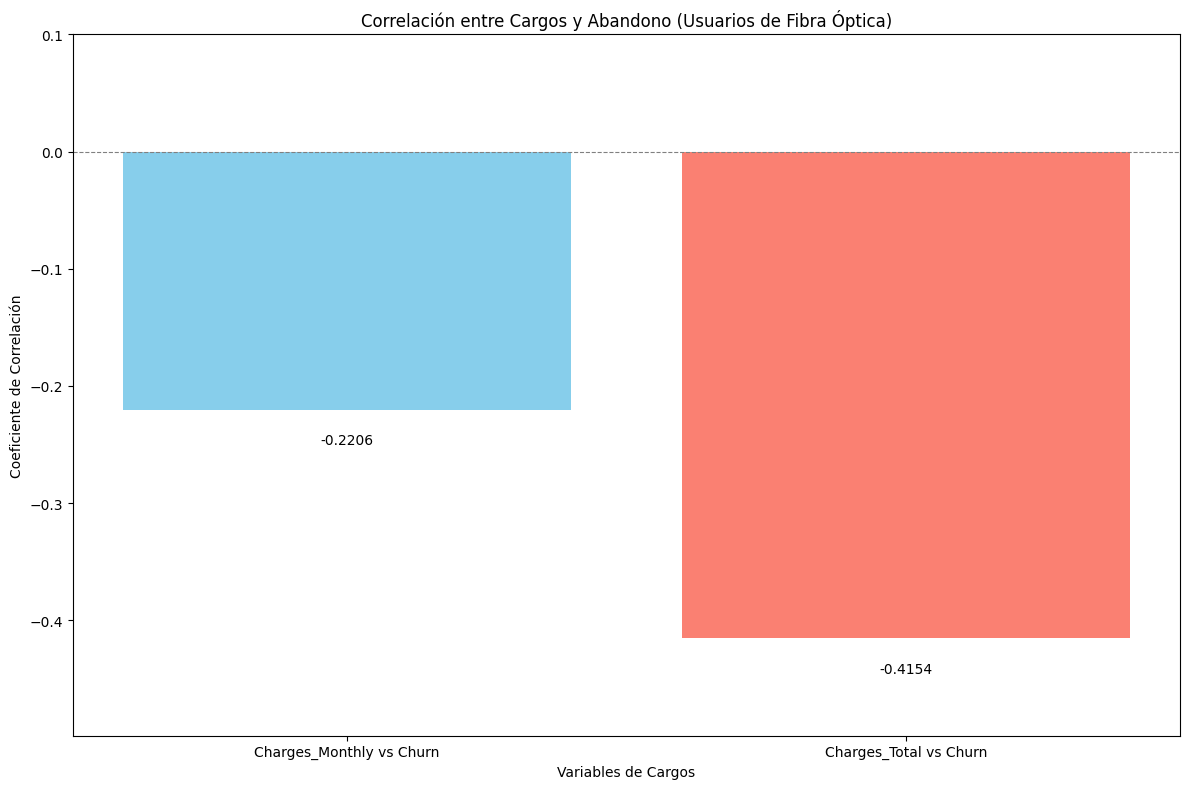

In [48]:
plt.figure(figsize=(12, 8))
bars = plt.bar(correlation_series.index, correlation_series.values, color=['skyblue', 'salmon'])

plt.title('Correlación entre Cargos y Abandono (Usuarios de Fibra Óptica)')
plt.xlabel('Variables de Cargos')
plt.ylabel('Coeficiente de Correlación')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Línea en 0 para referencia

# Ajustar los límites del eje Y para que los valores negativos se vean bien
min_val = min(correlation_series.values) * 1.2 # Añadir un 20% de espacio extra
max_val = max(correlation_series.values) * 0.8 if max(correlation_series.values) > 0 else 0.1
plt.ylim(min_val, max_val)

# Añadir etiquetas de valor en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.02, f'{yval:.4f}', ha='center', va='top' if yval < 0 else 'bottom', color='black')

plt.tight_layout()
plt.show()

##📄Informe final